In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(len(X_train))
print(len(X_test))

60000
10000


In [4]:
#normalisasi dataset
X_train = X_train/255
X_test = X_test/255

In [5]:
X_train[0].shape

(28, 28)

In [1]:
X_train[0]

NameError: name 'X_train' is not defined

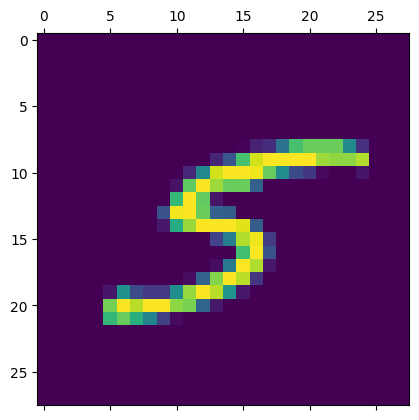

In [7]:
plt.matshow(X_train[523])

In [8]:
y_train[523]

5

In [9]:
print(X_train.shape)
X_train_flattened = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test_flattened = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
X_train_flattened.shape

(60000, 28, 28)


(60000, 784)

In [10]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
model = keras.Sequential([
    #10 -> output, input shape itu jumlah neuran, y->klo input ada channelnya
    keras.layers.Dense(10, input_shape=(X_train_flattened.shape[1], ), activation='sigmoid')
])

model.compile(
    optimizer='adam', #fungsi untuk mencapai global optima secara efisien ketika melakukan backward error propagation
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)



Epoch 1/10


1875/1875 [==============================] - 5s 2ms/step - loss: 0.4719 - accuracy: 0.8765
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3045 - accuracy: 0.9151
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.9204
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9240
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9261
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2618 - accuracy: 0.9277
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2587 - accuracy: 0.9281
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2555 - accuracy: 0.9286
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2530 - accuracy: 0.9299
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0

In [12]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2679 - accuracy: 0.9249


[0.267852246761322, 0.9248999953269958]

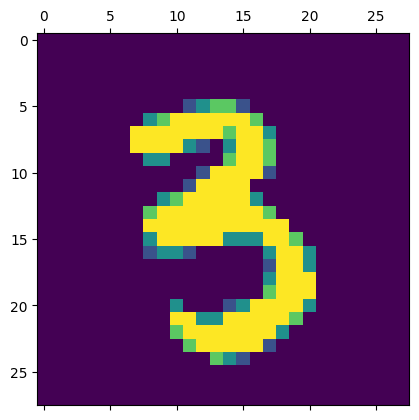

In [13]:
plt.matshow(X_test[382])

In [14]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 1ms/step


In [15]:
y_predicted[382]

array([5.4618693e-04, 6.7623972e-04, 1.3018412e-03, 9.9090660e-01,
       1.2933919e-03, 8.4920490e-01, 3.2646910e-03, 5.5822561e-04,
       2.6382846e-01, 4.4498947e-02], dtype=float32)

In [16]:
#print index dari maksimal value (yg terprediksi)
np.argmax(y_predicted[382])

3

In [17]:
y_predicted_labels = [np.argmax(x) for x in y_predicted]

In [18]:
#confusion matrix with tf
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    6,    6,    4,    1,    0],
       [   0, 1111,    3,    3,    0,    1,    3,    2,   12,    0],
       [   5,    9,  902,   29,   11,    5,   13,   14,   41,    3],
       [   2,    0,   10,  944,    1,   18,    2,   10,   19,    4],
       [   1,    1,    3,    2,  928,    0,    9,    5,   10,   23],
       [   7,    2,    1,   43,   10,  777,   13,    9,   25,    5],
       [   8,    3,    3,    2,    7,   17,  914,    2,    2,    0],
       [   1,    6,   17,   12,    8,    0,    0,  961,    4,   19],
       [   8,    8,    6,   36,    9,   29,    9,   12,  849,    8],
       [  11,    7,    1,   14,   32,    5,    0,   33,    3,  903]])>

Text(69.0, 0.5, 'Truth')

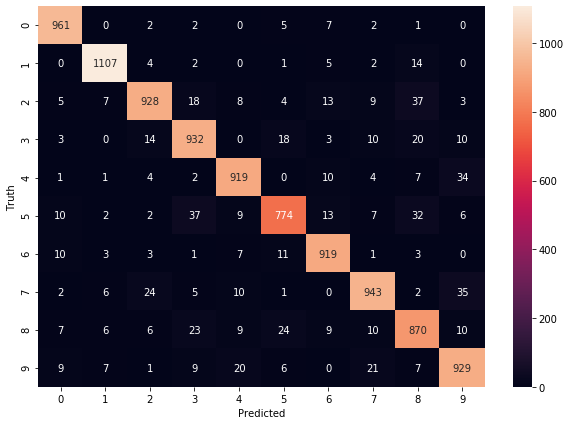

In [47]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Hidden Layer

In [19]:
model = keras.Sequential([
    #10 -> output, input shape itu jumlah neuran, y->klo input ada channelnya
    keras.layers.Dense(100, input_shape=(X_train_flattened.shape[1], ), activation='relu'),
    keras.layers.Dense(40, input_shape=(X_train_flattened.shape[1], ), activation='relu'),
    keras.layers.Dense(10, input_shape=(X_train_flattened.shape[1], ), activation='sigmoid')
])

model.compile(
    optimizer='adam', #fungsi untuk mencapai global optima secara efisien ketika melakukan backward error propagation
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2604 - accuracy: 0.9244
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1153 - accuracy: 0.9641
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0812 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0622 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0500 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0398 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0326 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0278 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0235 - accuracy: 0.9921
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.022

In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0941 - accuracy: 0.9777


[0.09410376846790314, 0.9776999950408936]

In [21]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

313/313 [==============================] - 1s 2ms/step


NameError: name 'sn' is not defined

<Figure size 1000x700 with 0 Axes>

### Flatten input in keras

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(X_train[0].shape[0], X_train[0].shape[1])),
    #10 -> output, input shape itu jumlah neuran, y->klo input ada channelnya
    keras.layers.Dense(100, input_shape=(X_train_flattened.shape[1], ), activation='relu'),
    keras.layers.Dense(40, input_shape=(X_train_flattened.shape[1], ), activation='relu'),
    keras.layers.Dense(10, input_shape=(X_train_flattened.shape[1], ), activation='sigmoid')
])

model.compile(
    optimizer='adam', #fungsi untuk mencapai global optima secara efisien ketika melakukan backward error propagation
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2600 - accuracy: 0.9241
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1139 - accuracy: 0.9659
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0787 - accuracy: 0.9763
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0632 - accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0504 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0404 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0351 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0276 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0249 - accuracy: 0.9919
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.020

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0873 - accuracy: 0.9772


[0.08730277419090271, 0.9771999716758728]

In [25]:
model.save("./saved_model")

INFO:tensorflow:Assets written to: ./saved_model\assets


INFO:tensorflow:Assets written to: ./saved_model\assets


(2) Quantization aware training

In [4]:
import tensorflow_model_optimization as tfmot